# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 100
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data

In [4]:
df = pd.read_csv('EastWestAirlines.csv')
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [6]:
zero_pct = (df['Qual_miles'] == 0).mean() * 100
print(f"Percentage of zeros: {zero_pct:.2f}%")


Percentage of zeros: 94.35%


In [8]:
df = df.drop(columns=['Qual_miles'])
df

,ID#,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,1,1,1,174,1,0,0,7000,0
1,2,19244,1,1,1,215,2,0,0,6968,0
2,3,41354,1,1,1,4123,4,0,0,7034,0
3,4,14776,1,1,1,500,1,0,0,6952,0
4,5,97752,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,1,1,1,981,5,0,0,1395,1
3996,4019,73597,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,1,1,1,500,1,500,1,1401,0


In [ ]:
'''
The Qual_miles column has dropped because it contained 94.35% zero values.
The column was dropped to improve clustering performance.
'''

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [12]:
df.describe()

,ID#,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [14]:
df.isna().sum()

ID#                  0
Balance              0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [16]:
df.dtypes

ID#                  int64
Balance              int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [20]:
df.duplicated().sum()

0

In [22]:
df.nunique()

ID#                  3999
Balance              3904
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

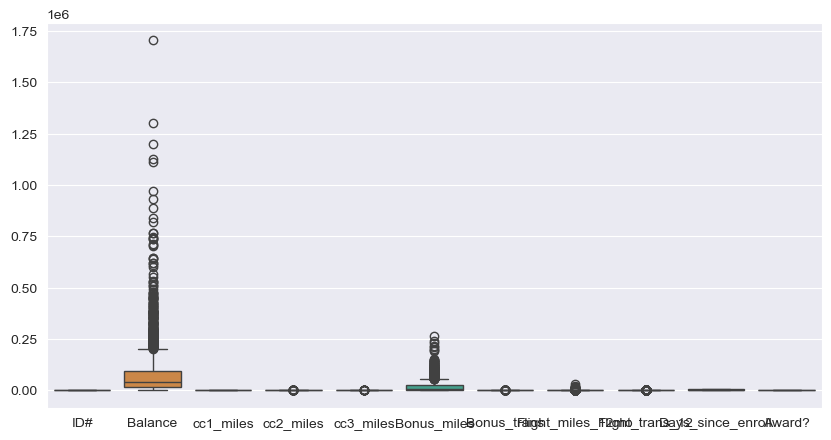

In [24]:
sns.boxplot(df)
plt.show()

In [26]:
# from above boxplot we can see the outliers are present in out data.

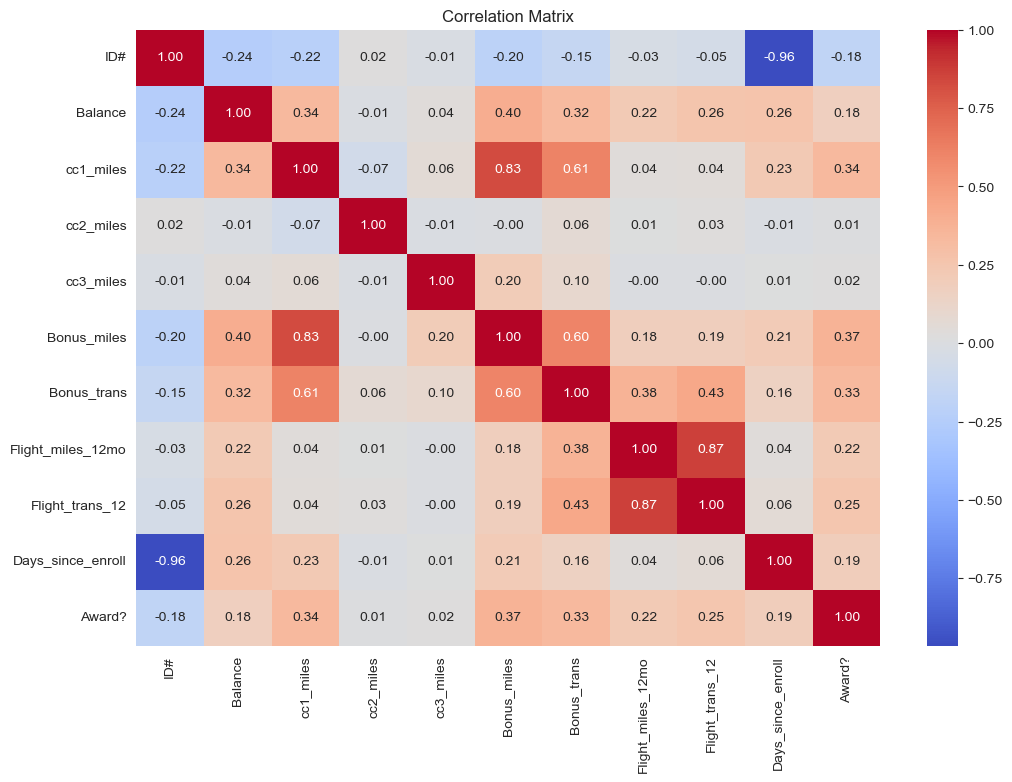

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
'''
In above heatmap we can see that there is high corrlation between Flight_miles_12mo and Flight_trans_12
after that we can also see that cc1_miles and Bonus_miles also high correlated
also ID# and Days_since_enroll is also highly correlated but negatively.
'''

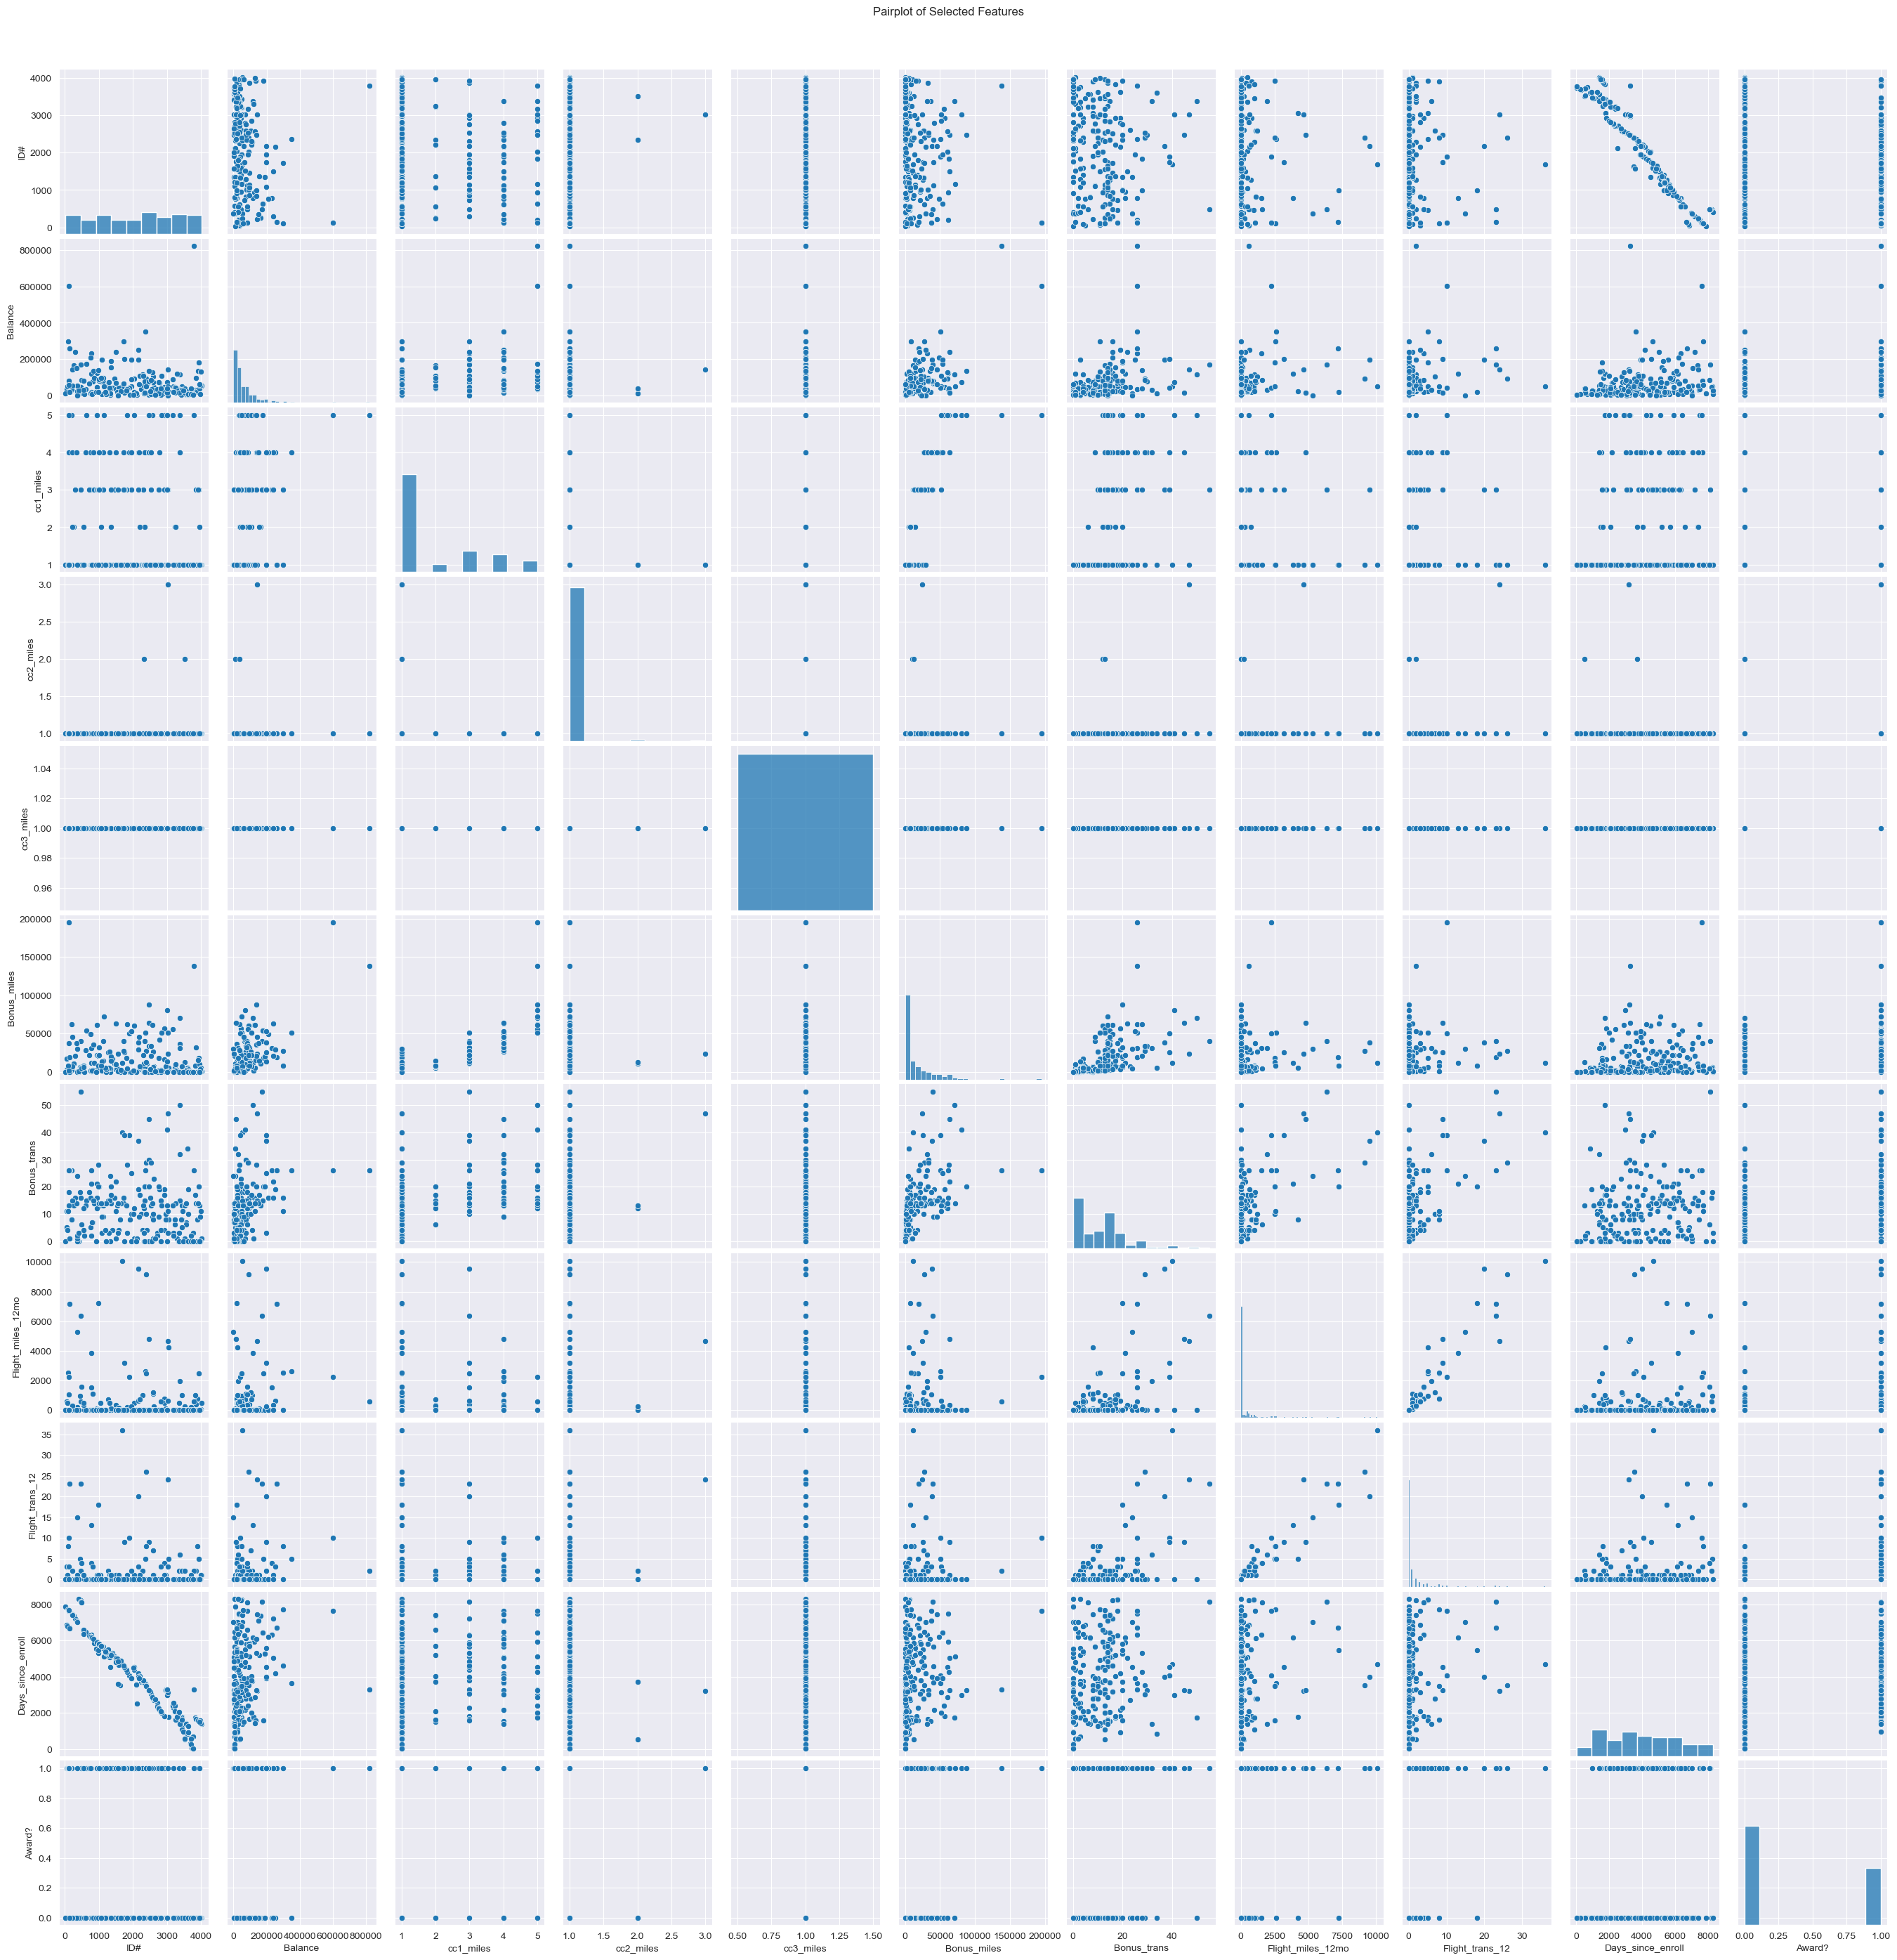

In [30]:
sns.pairplot(df.sample(200))
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
'''
diagonal shows the distribution of each individual variable 
off-diagonal shows scatter plots comparing every pair of variables.
a straight line indicates a strong linear relationship
can also see some clusters which can be useful for further clustering analysis.
'''

In [32]:
from scipy.stats import zscore

In [34]:
df_z = df.drop(columns=["ID#", "Award?"])
z_scores = np.abs(zscore(df_z))
df_clean = df_z[(z_scores < 3).all(axis=1)]

In [39]:
# Droped the column ID# and Award? they're not relevant for clustering.
# Applied z-score helps remove extreme global outliers.

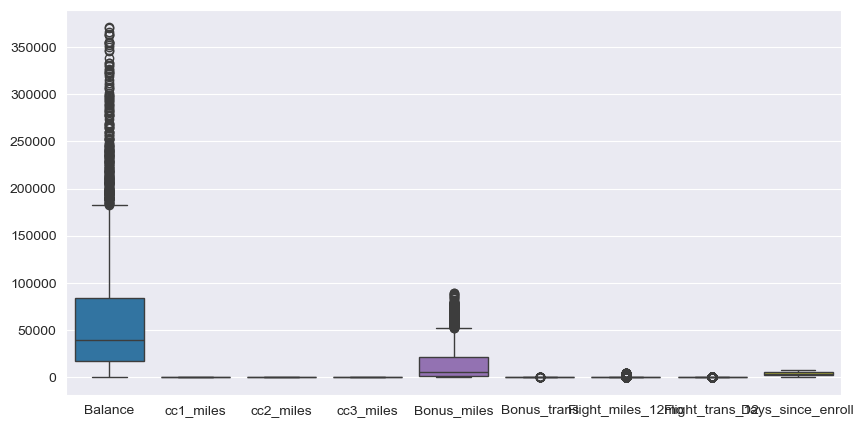

In [36]:
sns.boxplot(df_clean)
plt.show() 

In [43]:
#z-score remove extreme global outliers as we can see more outliers present in above boxplot i will treat them with iqr

In [38]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > upper, upper,
                           np.where(df[col] < lower, lower, df[col]))
    return df

In [40]:
columns_to_cap = ['Balance','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']

In [42]:
df_capped = cap_outliers(df_clean, columns_to_cap)

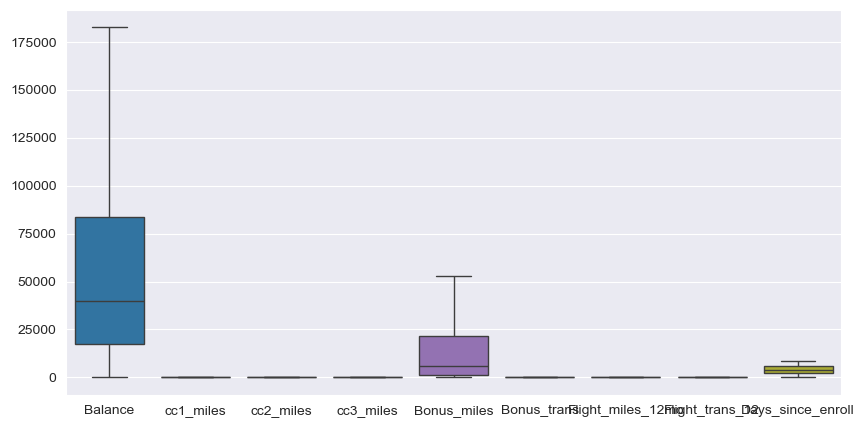

In [44]:
sns.boxplot(df_capped)
plt.show() 

In [53]:
# After iqr boxplot shows outliers are remove sucessfully. Now I will scale the data .
#scaling the data before clustering is Essential.

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
x = sc.fit_transform(df_capped)

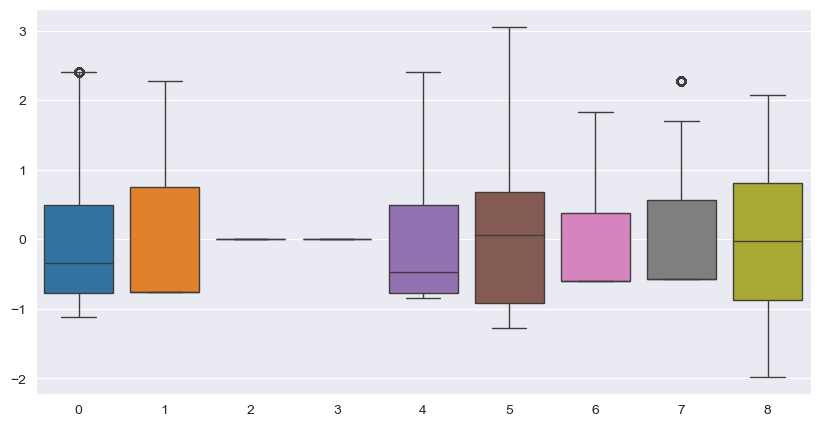

In [50]:
sns.boxplot(x)
plt.show()

In [ ]:
''' after scaling the data still there is outliers are present 
its totally normal to see one or two outliers in the boxplot even after cleaning the data
That just means a few values are still far from the rest but they’re not wrong, just unusual
'''

In [154]:
# PCA (Principal Component Analysis )

In [ ]:
'''
I am applying PCA to reduce number of dimensions in my dataset because it contains a large number of columns.
By Applying PCA before K-Means , I can transform the data into 2D , making it easier to visualize and interpret.
PCA helps clustering algorithms like k-Means run more efficiently by reducing the dimensionality of the data.
'''

In [52]:
import numpy as np
variances = np.var(x, axis=0) # It will calculate variance of each column

filtered_data = x[:, variances > 0] # keep only columns with variance > 0 

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)

# K- Means

In [56]:
from sklearn.cluster import KMeans

In [58]:
km = KMeans() 
yp = km.fit_predict(x)
yp

array([5, 5, 5, ..., 2, 0, 1])

In [60]:
len(yp)

3702

In [62]:
km.cluster_centers_

array([[ 0.13469799, -0.66047552,  0.        ,  0.        , -0.49455825,
        -0.27847209,  1.70957602,  1.64938105, -0.01980305],
       [-0.6609338 , -0.74723692,  0.        ,  0.        , -0.7288504 ,
        -0.92460197, -0.56004046, -0.52544888, -1.00235601],
       [-0.34205442,  0.0588223 ,  0.        ,  0.        , -0.07552091,
         0.76077678, -0.53162874, -0.49558173, -0.72555671],
       [ 0.850506  ,  1.38013552,  0.        ,  0.        ,  1.44334536,
         1.27222028,  1.71210351,  1.50703113,  0.30165218],
       [ 1.35188189,  1.81844314,  0.        ,  0.        ,  1.97643421,
         0.92691149, -0.55644273, -0.50309695,  0.35521355],
       [-0.60110537, -0.70253176,  0.        ,  0.        , -0.67663974,
        -0.71951452, -0.56746333, -0.53890453,  0.78065254],
       [-0.16629064,  1.12523821,  0.        ,  0.        ,  0.87790546,
         0.66196183, -0.55246958, -0.5066665 ,  0.63743989],
       [ 1.54844753,  0.00354624,  0.        ,  0.        , -0

In [64]:
x

array([[-0.57094123, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544,  1.43490923],
       [-0.74263836, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544,  1.41931002],
       [-0.31604844, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544,  1.45148339],
       ...,
       [ 0.30604738,  0.75733115,  0.        , ..., -0.59531518,
        -0.57583544, -1.29397801],
       [-0.05471147, -0.75610471,  0.        , ...,  1.82813885,
         0.56230807, -1.29446549],
       [-1.05574108, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544, -1.29592791]])

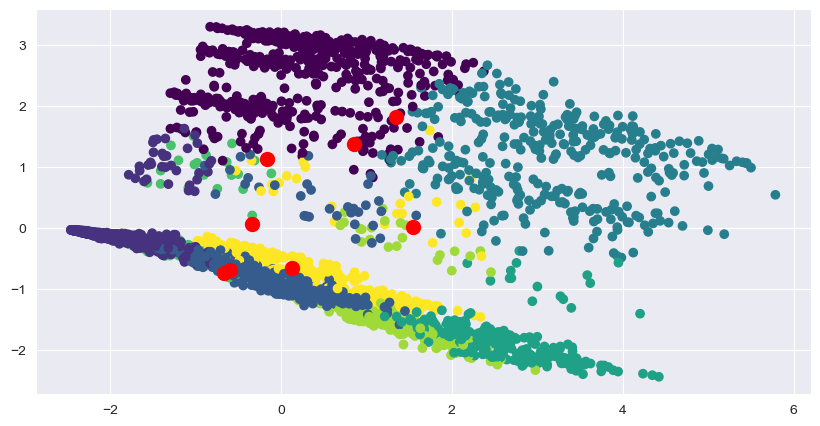

In [66]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c = yp, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'red',s = 100)
plt.show()

In [68]:
km.cluster_centers_

array([[ 0.13469799, -0.66047552,  0.        ,  0.        , -0.49455825,
        -0.27847209,  1.70957602,  1.64938105, -0.01980305],
       [-0.6609338 , -0.74723692,  0.        ,  0.        , -0.7288504 ,
        -0.92460197, -0.56004046, -0.52544888, -1.00235601],
       [-0.34205442,  0.0588223 ,  0.        ,  0.        , -0.07552091,
         0.76077678, -0.53162874, -0.49558173, -0.72555671],
       [ 0.850506  ,  1.38013552,  0.        ,  0.        ,  1.44334536,
         1.27222028,  1.71210351,  1.50703113,  0.30165218],
       [ 1.35188189,  1.81844314,  0.        ,  0.        ,  1.97643421,
         0.92691149, -0.55644273, -0.50309695,  0.35521355],
       [-0.60110537, -0.70253176,  0.        ,  0.        , -0.67663974,
        -0.71951452, -0.56746333, -0.53890453,  0.78065254],
       [-0.16629064,  1.12523821,  0.        ,  0.        ,  0.87790546,
         0.66196183, -0.55246958, -0.5066665 ,  0.63743989],
       [ 1.54844753,  0.00354624,  0.        ,  0.        , -0

In [70]:
km.inertia_

7397.990213761357

# Elbow graph /Elbow Curve

In [72]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [74]:
#WCSS (Within-Cluster Sum of Squares)
wcss

[25914.00000000002,
 17700.169455627685,
 13150.827777142855,
 10966.476238967432,
 10465.390896996834,
 9295.884493165884,
 7805.306982172029,
 7315.745381921948,
 6911.432517626159,
 6525.198044877548]

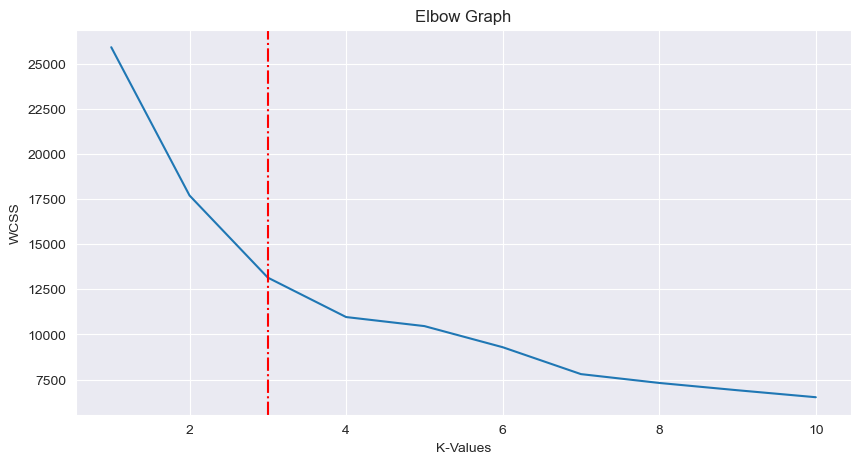

In [76]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 3, linestyle = '-.', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

In [93]:
# Final Model

In [78]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 2, 0])

In [80]:
km.cluster_centers_

array([[-0.483487  , -0.60021768,  0.        ,  0.        , -0.60012222,
        -0.51142193, -0.56254419, -0.53047465, -0.2093276 ],
       [ 0.71274734,  1.29948967,  0.        ,  0.        ,  1.22740622,
         0.88707371, -0.1417196 , -0.17082528,  0.35663593],
       [ 0.257301  , -0.28670805,  0.        ,  0.        , -0.18159639,
         0.07754202,  1.71875198,  1.67512434,  0.04116352]])

In [82]:
km.cluster_centers_[:,0]

array([-0.483487  ,  0.71274734,  0.257301  ])

In [84]:
km.cluster_centers_[:,1]

array([-0.60021768,  1.29948967, -0.28670805])

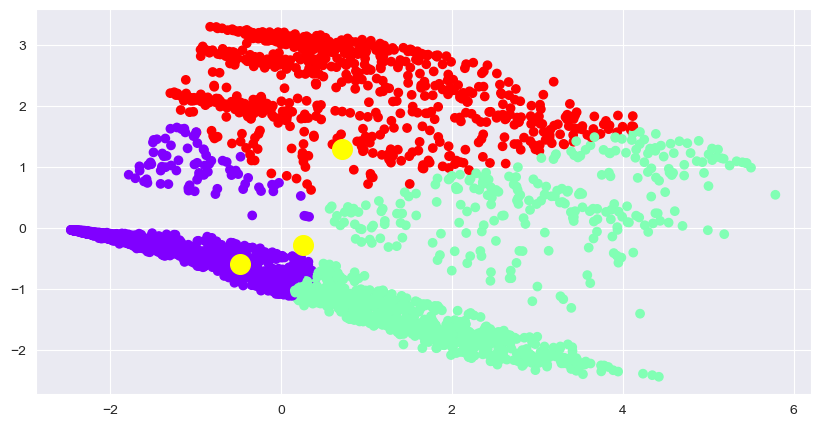

In [86]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)
plt.show()

In [88]:
from sklearn.metrics import silhouette_score
# Fit KMeans with chosen K (let's assume K = 3 based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

# Evaluate clustering using silhouette score
sil_score = silhouette_score(x, kmeans_labels)
print(f'Silhouette Score for K-Means: {sil_score}')


Silhouette Score for K-Means: 0.35886837341500427


In [ ]:
'''
For K-Means, the score is 0.3588, which is moderate. 
This means the clusters are fairly well-formed but could be improved.
'''

# Hierarchical

In [90]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


In [92]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

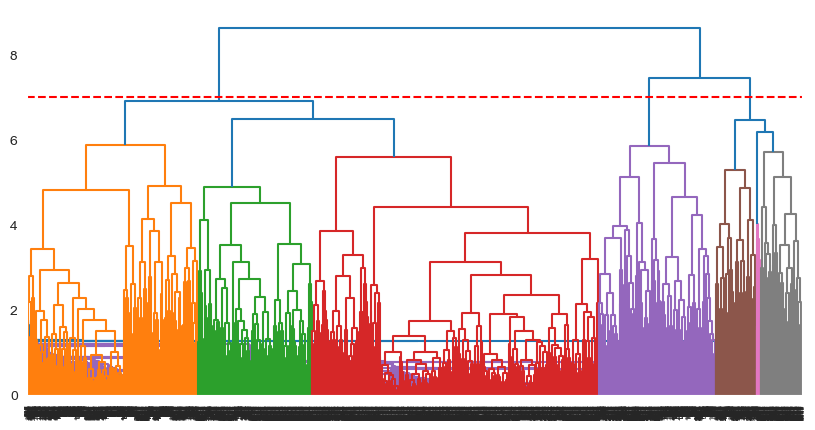

In [93]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')
plt.show() 

In [94]:
hc = AgglomerativeClustering(n_clusters=4)
yp = hc.fit_predict(x)
yp

array([2, 2, 2, ..., 0, 1, 2], dtype=int64)

In [95]:
#Experiment with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average']
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    hierarchical.fit(x)
    hierarchical_labels = hierarchical.labels_
    print(f"Linkage: {linkage}, Silhouette Score: {silhouette_score(x, hierarchical_labels)}")

Linkage: ward, Silhouette Score: 0.29502846033509167
Linkage: complete, Silhouette Score: 0.28810488928267547
Linkage: average, Silhouette Score: 0.31682172717917106


In [ ]:
'''
Average linkage gave the best score 0.3168, meaning it formed slightly better clusters.
Ward and Complete had lower scores 0.29 and 0.28,  shows less clear separation between clusters.
'''

# DBSCAN

In [96]:
from sklearn.cluster import DBSCAN

In [97]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([ 0,  0,  0, ..., 66,  9,  0], dtype=int64)

In [98]:
x

array([[-0.57094123, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544,  1.43490923],
       [-0.74263836, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544,  1.41931002],
       [-0.31604844, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544,  1.45148339],
       ...,
       [ 0.30604738,  0.75733115,  0.        , ..., -0.59531518,
        -0.57583544, -1.29397801],
       [-0.05471147, -0.75610471,  0.        , ...,  1.82813885,
         0.56230807, -1.29446549],
       [-1.05574108, -0.75610471,  0.        , ..., -0.59531518,
        -0.57583544, -1.29592791]])

In [99]:
db = DBSCAN(eps=2.,min_samples=3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
#Experiment with different epsilon values
eps_values = [0.5, 1, 1.5]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(x)
    dbscan_labels = dbscan.labels_
    print(f"Epsilon: {eps}, Number of clusters: {len(np.unique(dbscan_labels))}")

Epsilon: 0.5, Number of clusters: 10
Epsilon: 1, Number of clusters: 9
Epsilon: 1.5, Number of clusters: 2


In [ ]:
'''
Smaller eps gives more precise clusters and,larger eps creates more merged clusters.
'''